<a href="https://colab.research.google.com/github/DB2557/DL_202511057_Dhara/blob/main/LAB1/lab1_fake_reviews_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv(f'/content/drive/MyDrive/DL/lab1/fake_reviews_dataset.csv')
df.head()
print(df.columns)


Index(['category', 'rating', 'label', 'text_'], dtype='object')


In [8]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

df["clean_review"] = df["text_"].apply(clean_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [16]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df["clean_review"]).toarray()


In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["category"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_category = Sequential()

# Hidden layer (ONLY ONE)
model_category.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Output layer
# Using len(label_encoder.classes_) for the number of output units
model_category.add(Dense(len(label_encoder.classes_), activation='softmax'))

model_category.compile(
    optimizer='adam',
    # Using sparse_categorical_crossentropy for integer-encoded labels
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_category.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       384,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385,418 (1.47 MB)

 Trainable params: 385,418 (1.47 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model_category.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/20
910/910 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.6198 - loss: 3.4678 - val_accuracy: 0.7230 - val_loss: 0.9012
Epoch 2/20
910/910 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8940 - loss: 0.3222 - val_accuracy: 0.7264 - val_loss: 0.9235
Epoch 3/20
910/910 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9294 - loss: 0.2271 - val_accuracy: 0.7243 - val_loss: 0.9606
Epoch 4/20
910/910 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9525 - loss: 0.1735 - val_accuracy: 0.7240 - val_loss: 1.0138
Epoch 5/20
910/910 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9664 - loss: 0.1388 - val_accuracy: 0.7202 - val_loss: 1.0694
Epoch 6/20
910/910 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9778 - loss: 0.1048 - val_accuracy: 0.7218 - val_loss: 1.1219
Epoch 7/20
910/910 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9856 - loss: 0.0766 - val_accuracy: 0.7181 - val_loss: 1.1913
Epoch 8/20
910/910 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9904 - loss: 0.0577 - val_accuracy:

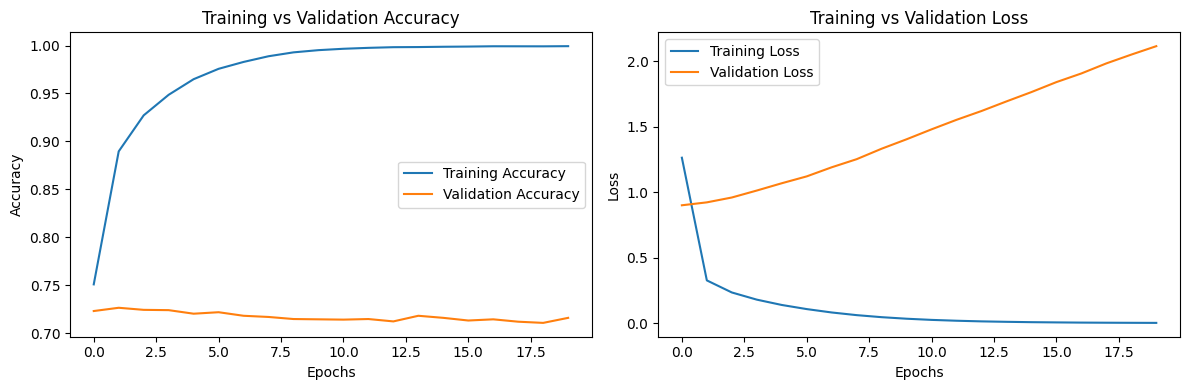

In [47]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [56]:
import numpy as np

y_pred = model_category.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test

print("Accuracy:", accuracy_score(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.10943489551131445
                              precision    recall  f1-score   support

                     Books_5       0.50      0.12      0.19      4016
Clothing_Shoes_and_Jewelry_5       0.52      0.10      0.17      4071
               Electronics_5       0.00      0.00      0.00         0
          Home_and_Kitchen_5       0.00      0.00      0.00         0
              Kindle_Store_5       0.00      0.00      0.00         0
             Movies_and_TV_5       0.00      0.00      0.00         0
              Pet_Supplies_5       0.00      0.00      0.00         0
       Sports_and_Outdoors_5       0.00      0.00      0.00         0
Tools_and_Home_Improvement_5       0.00      0.00      0.00         0
            Toys_and_Games_5       0.00      0.00      0.00         0

                    accuracy                           0.11      8087
                   macro avg       0.10      0.02      0.04      8087
                w

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
df["fake_label"] = df["label"].map({"OR": 1, "CG": 0})

In [50]:
X = tfidf.fit_transform(df["clean_review"]).toarray()
y = df["fake_label"].values


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [53]:
model_fake = Sequential()

model_fake.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

model_fake.add(Dense(1, activation='sigmoid'))

model_fake.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_fake.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │       192,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 192,129 (750.50 KB)

 Trainable params: 192,129 (750.50 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model_fake.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8048 - loss: 0.4747 - val_accuracy: 0.8723 - val_loss: 0.2948
Epoch 2/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8890 - loss: 0.2611 - val_accuracy: 0.8767 - val_loss: 0.2959
Epoch 3/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9024 - loss: 0.2345 - val_accuracy: 0.8736 - val_loss: 0.2985
Epoch 4/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9077 - loss: 0.2250 - val_accuracy: 0.8726 - val_loss: 0.3018
Epoch 5/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9095 - loss: 0.2139 - val_accuracy: 0.8649 - val_loss: 0.3045
Epoch 6/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9112 - loss: 0.2085 - val_accuracy: 0.8705 - val_loss: 0.3115
Epoch 7/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9194 - loss: 0.1934 - val_accuracy: 0.8702 - val_loss: 0.3154
Epoch 8/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9246 - loss: 0.1838 - val_accuracy: 0.

In [55]:
y_pred = model_fake.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels))


253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.868059849140596
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4016
           1       0.87      0.87      0.87      4071

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087

